In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [ ]:
df = pd.read_csv("../data/01_raw/European_Vanilla_dataset.csv")

# Data Summary

In [4]:
print(df.head())

  Option_type     S    K     T     r  sigma     q       bs_price  mc_price
0        call  50.0  100  0.08  0.01    0.1  0.00  1.026955e-133       0.0
1        call  50.0  100  0.08  0.01    0.1  0.01  5.122990e-134       0.0
2        call  50.0  100  0.08  0.01    0.1  0.02  2.553578e-134       0.0
3        call  50.0  100  0.08  0.01    0.1  0.03  1.271828e-134       0.0
4        call  50.0  100  0.08  0.01    0.1  0.04  6.329384e-135       0.0


In [5]:
for col in df.columns:
    print("unique values in column", col, ":\n", df[col].unique())

unique values in column Option_type :
 ['call' 'put']
unique values in column S :
 [ 50.  52.  54.  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.
  78.  80.  82.  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104.
 106. 108. 110. 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132.
 134. 136. 138. 140. 142. 144. 146. 148. 150.]
unique values in column K :
 [100]
unique values in column T :
 [0.08 0.25 0.5  1.   1.5  2.   2.5  3.   4.   5.  ]
unique values in column r :
 [0.01  0.025 0.05  0.075 0.1  ]
unique values in column sigma :
 [0.1 0.2 0.4 0.6 0.8]
unique values in column q :
 [0.   0.01 0.02 0.03 0.04 0.05]
unique values in column bs_price :
 [1.02695548e-133 5.12299005e-134 2.55357791e-134 ... 2.86020416e+001
 3.04209960e+001 2.98150182e+001]
unique values in column mc_price :
 [0.00000000e+00 7.57691261e-05 5.32102408e-05 ... 2.85549064e+01
 3.05092384e+01 2.98690645e+01]


In [6]:
print(df.describe())

                   S         K              T             r          sigma  \
count  153000.000000  153000.0  153000.000000  153000.00000  153000.000000   
mean      100.000000     100.0       1.983000       0.05200       0.420000   
std        29.439299       0.0       1.565125       0.03265       0.256126   
min        50.000000     100.0       0.080000       0.01000       0.100000   
25%        74.000000     100.0       0.500000       0.02500       0.200000   
50%       100.000000     100.0       1.750000       0.05000       0.400000   
75%       126.000000     100.0       3.000000       0.07500       0.600000   
max       150.000000     100.0       5.000000       0.10000       0.800000   

                   q       bs_price       mc_price  
count  153000.000000   1.530000e+05  153000.000000  
mean        0.025000   2.340649e+01      23.406672  
std         0.017078   1.971527e+01      19.716090  
min         0.000000  3.147372e-135       0.000000  
25%         0.010000   5.232921e

In [40]:
print(df[["black_scholes_price", "monte_carlo_price"]].describe())

       black_scholes_price  monte_carlo_price
count        153000.000000      153000.000000
mean             23.406492          23.406672
std              19.715274          19.716090
min               0.000000           0.000000
25%               5.232925           5.232650
50%              20.660650          20.664300
75%              37.461550          37.460425
max             116.737300         114.659700


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Option_type  153000 non-null  object 
 1   S            153000 non-null  float64
 2   K            153000 non-null  int64  
 3   T            153000 non-null  float64
 4   r            153000 non-null  float64
 5   sigma        153000 non-null  float64
 6   q            153000 non-null  float64
 7   bs_price     153000 non-null  float64
 8   mc_price     153000 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.5+ MB
None


In [52]:
df.duplicated().sum()

np.int64(0)

## Results:
Since our dataset is created manually we do not have any missing values, every column, except "option type", is numerical and well behave.

One of the good things to do is to change the object (string) type of Option type into the categorical type.
Also, one small thing that looks a bit unnecessary is the extremely small values on some black-scholes generated values.
Values like 1e-130 which is almost zero, and in real market (except some like FX) we usually deal with at most 2-4 digit after decimal point.

Also, I think keeping this small values, later in training, cause some residuals in error metrics and lead model to over-fit. (Just a gut feeling, no numerical proof.)


# Dataset Minor Cleanings

## Renaming

In [8]:
new_names = {
    "Option_type": "option_type",
    "S": "stock_price",
    "K": "strike_price",
    "T": "time_to_maturity",
    "r": "interest_rate",
    "sigma": "volatility",
    "q": "dividend_yield",
    "bs_price": "black_scholes_price",
    "mc_price": "monte_carlo_price",
}

df.rename(columns=new_names, inplace=True)

In [9]:
print(df.columns)

Index(['option_type', 'stock_price', 'strike_price', 'time_to_maturity',
       'interest_rate', 'volatility', 'dividend_yield', 'black_scholes_price',
       'monte_carlo_price'],
      dtype='object')


## Categorical type fixing

In [ ]:
df["option_type"] = df["option_type"].astype("category")

## Rounding values

In [11]:
df = df.round(4)

## Verifying Changes

In [12]:
print(df.head())

  option_type  stock_price  strike_price  time_to_maturity  interest_rate  \
0        call         50.0           100              0.08           0.01   
1        call         50.0           100              0.08           0.01   
2        call         50.0           100              0.08           0.01   
3        call         50.0           100              0.08           0.01   
4        call         50.0           100              0.08           0.01   

   volatility  dividend_yield  black_scholes_price  monte_carlo_price  
0         0.1            0.00                  0.0                0.0  
1         0.1            0.01                  0.0                0.0  
2         0.1            0.02                  0.0                0.0  
3         0.1            0.03                  0.0                0.0  
4         0.1            0.04                  0.0                0.0  


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   option_type          153000 non-null  category
 1   stock_price          153000 non-null  float64 
 2   strike_price         153000 non-null  int64   
 3   time_to_maturity     153000 non-null  float64 
 4   interest_rate        153000 non-null  float64 
 5   volatility           153000 non-null  float64 
 6   dividend_yield       153000 non-null  float64 
 7   black_scholes_price  153000 non-null  float64 
 8   monte_carlo_price    153000 non-null  float64 
dtypes: category(1), float64(7), int64(1)
memory usage: 9.5 MB
None


# Exploring data visually

In [14]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["category"]).columns.tolist()
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['stock_price', 'strike_price', 'time_to_maturity', 'interest_rate', 'volatility', 'dividend_yield', 'black_scholes_price', 'monte_carlo_price']
Categorical columns: ['option_type']


## Exploring Distributions

I know it may look not necessary, I just wanted to do it as the standard procedure and to make sure of my data generation.

### Numerical variables

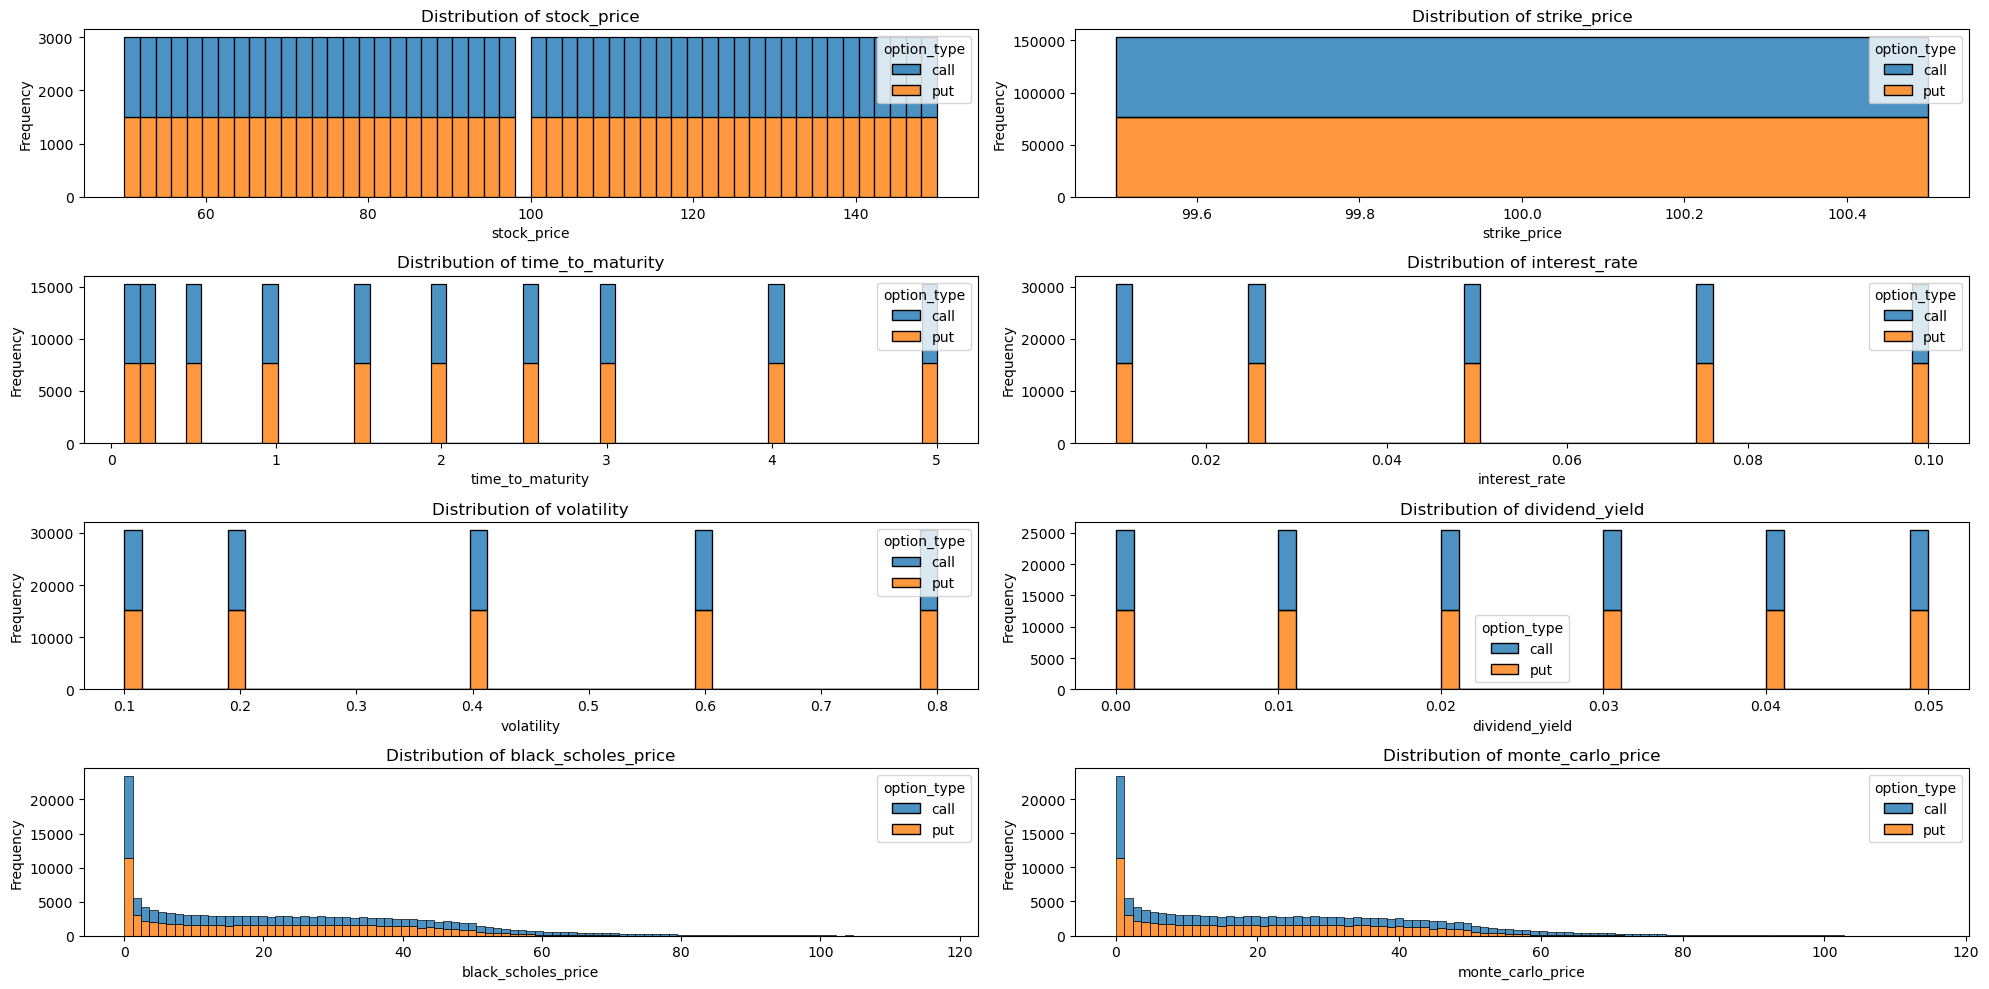

In [36]:
# making subplots for distribution of numerical variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df,
        x=col,
        hue="option_type",
        multiple="stack",
        alpha=0.8,
        ax=axes[i],
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

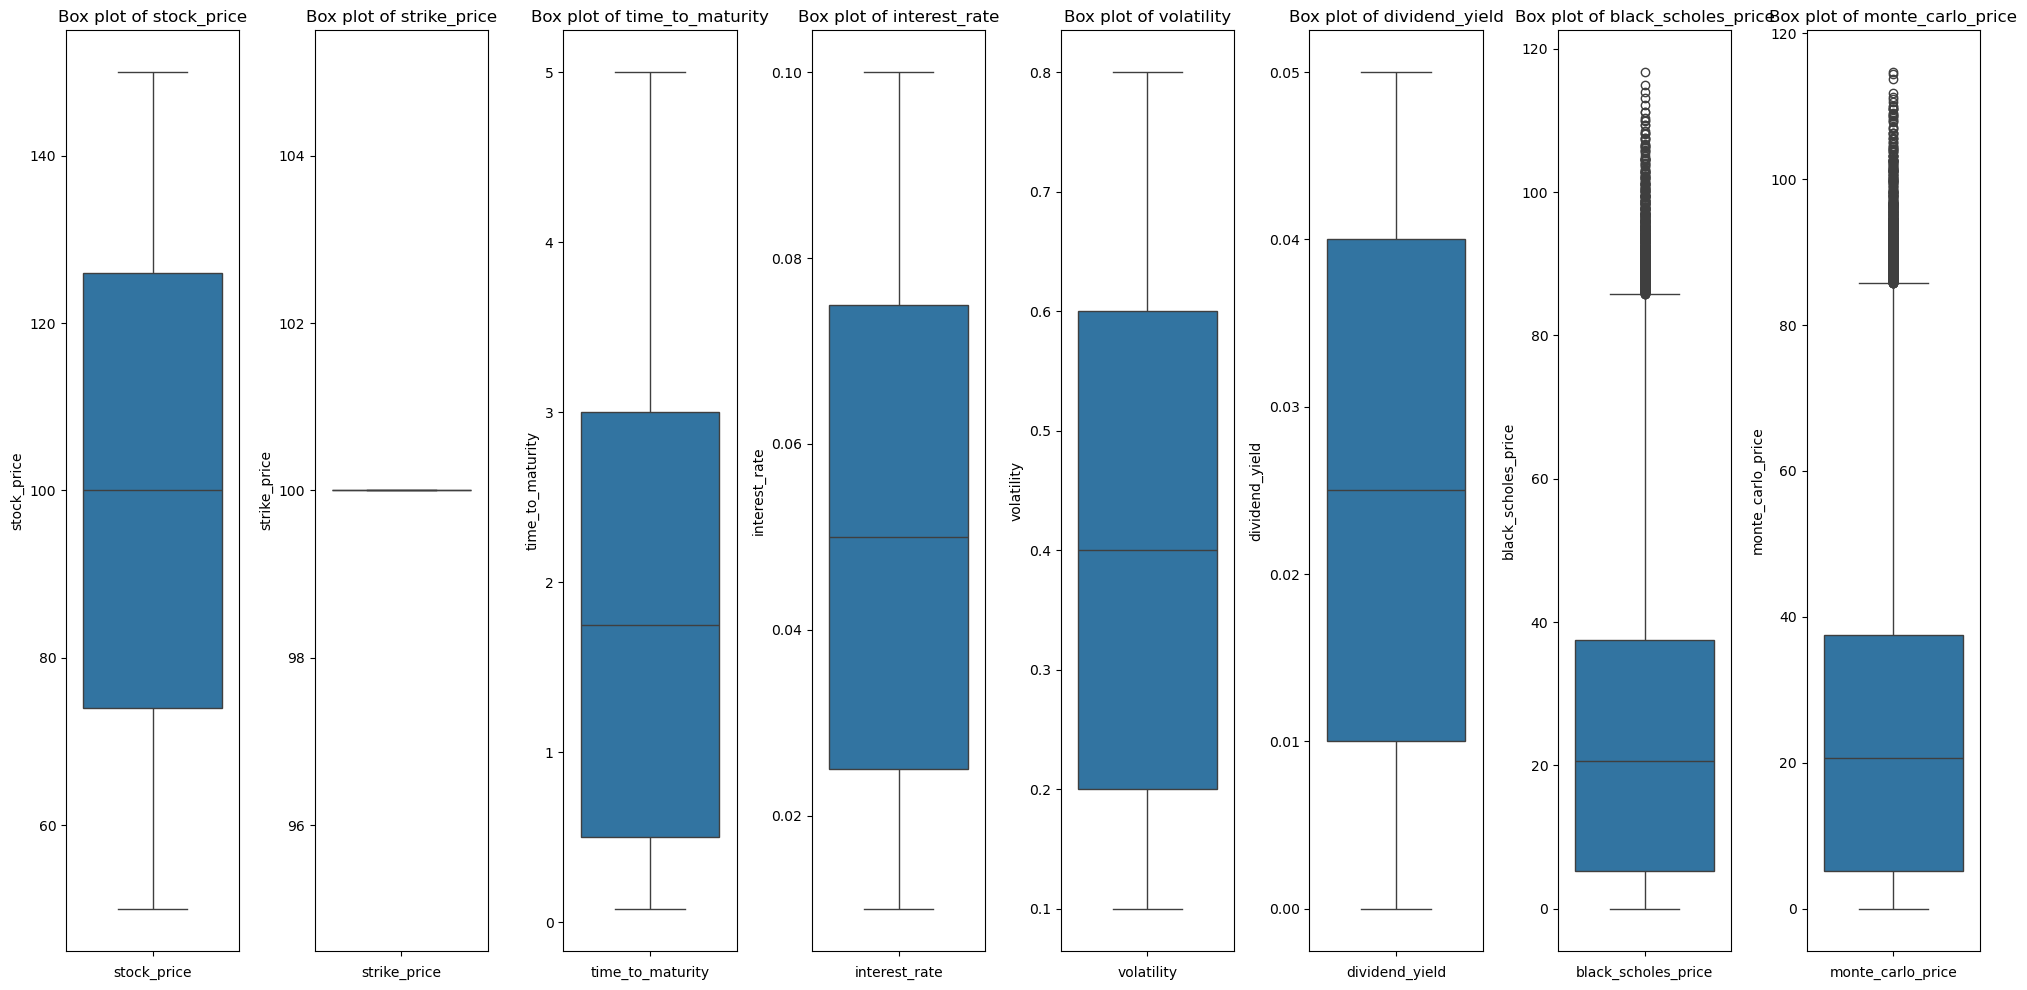

In [16]:
# making subplots for distribution of numerical variables
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Box plot of {col}")
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

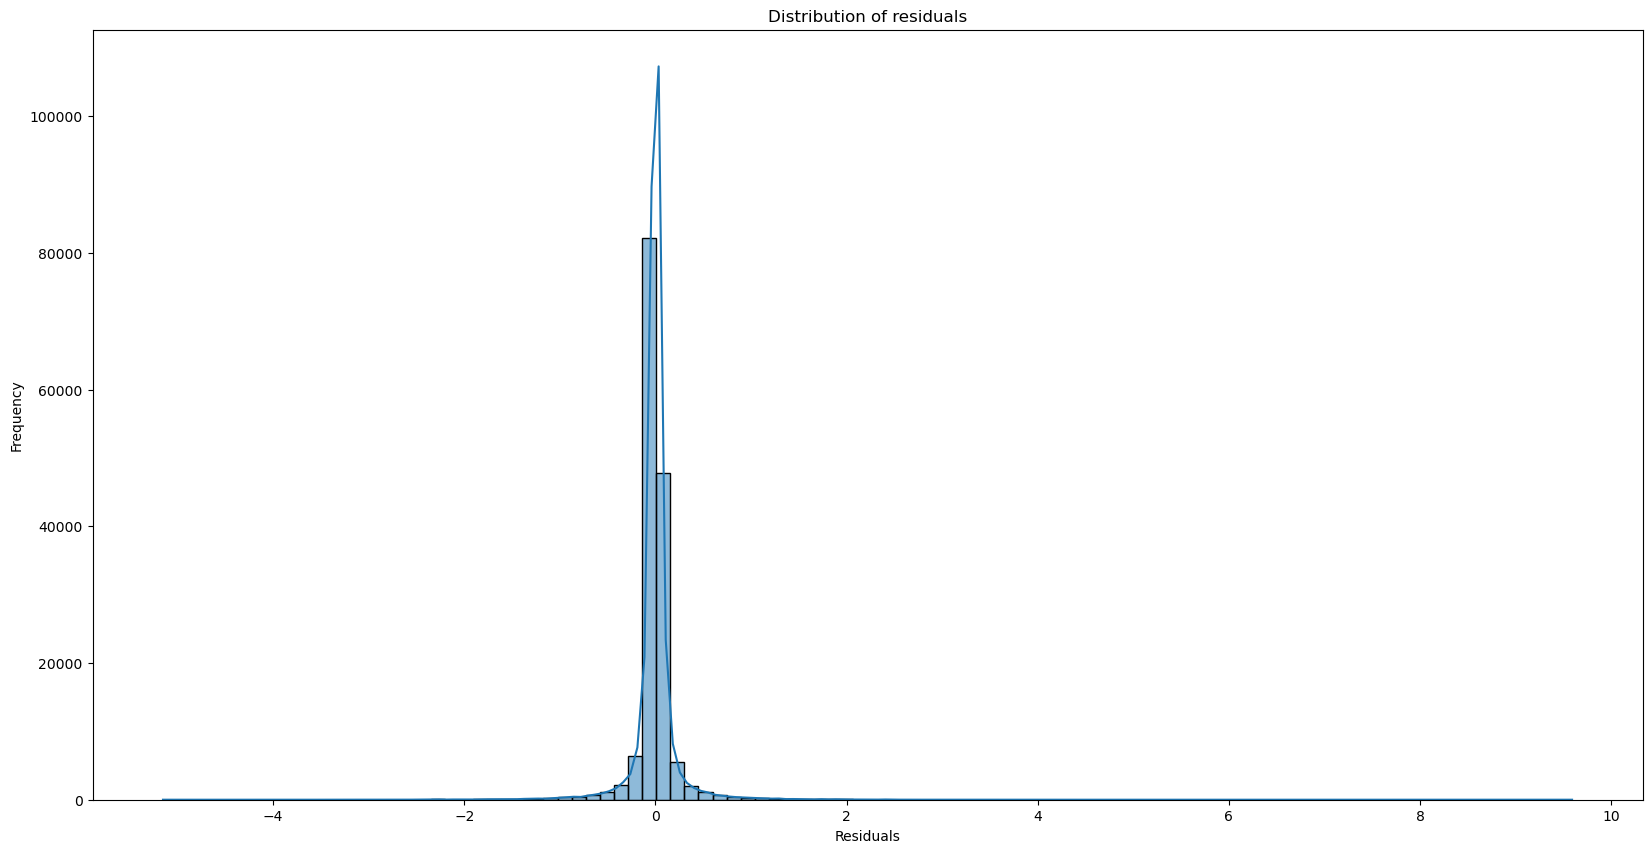

In [49]:
fig = plt.figure(figsize=(20, 10))
df["residual"] = df["monte_carlo_price"] - df["black_scholes_price"]
sns.histplot(df["residual"], bins=100, kde=True)
plt.title("Distribution of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

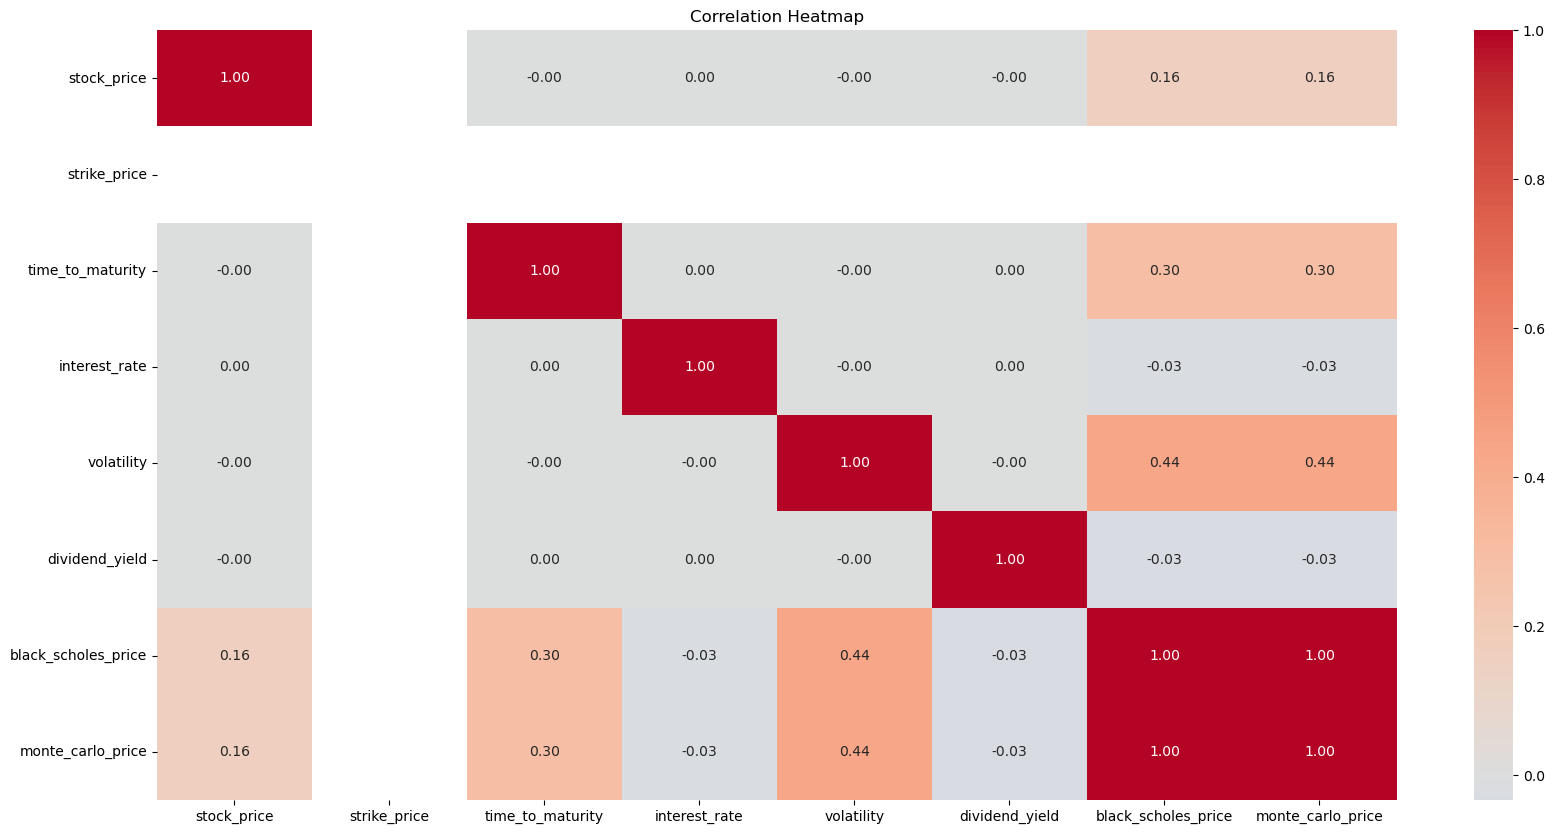

In [17]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 2000x2000 with 0 Axes>

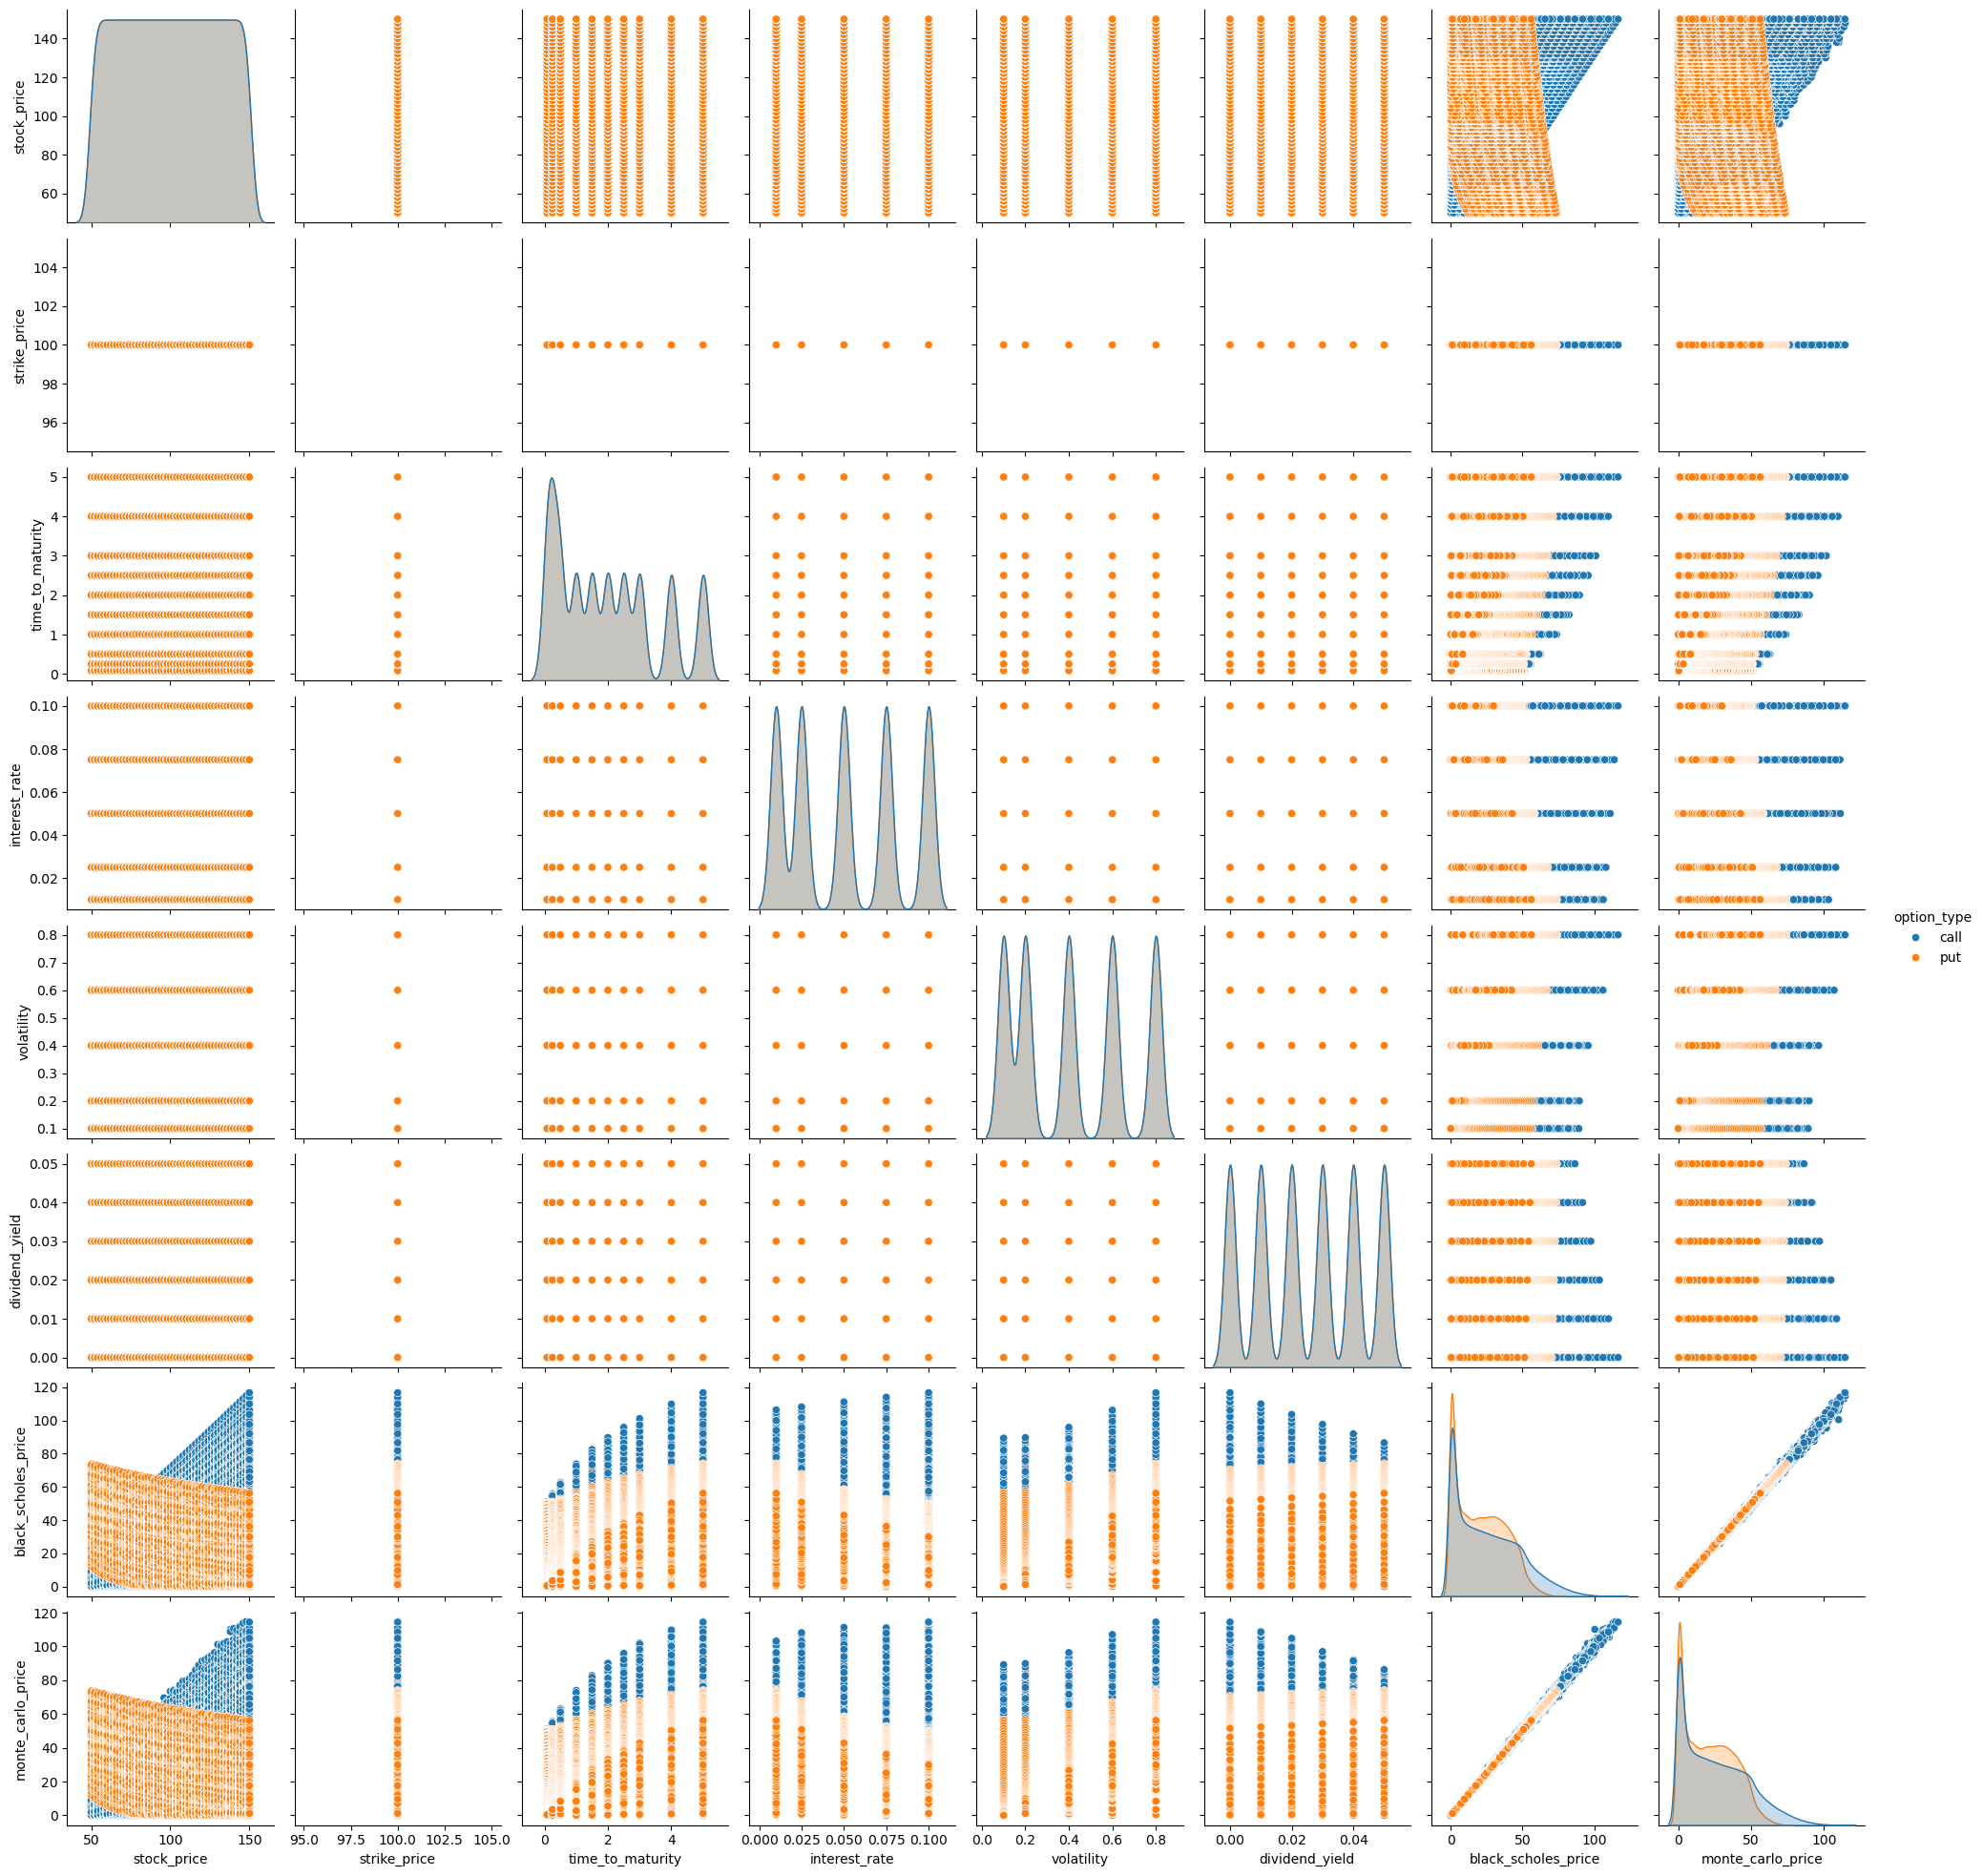

In [37]:
fig = plt.figure(figsize=(20, 20))
sns.pairplot(df, hue="option_type", markers="o")
plt.show()

### Categorical variable

<Axes: xlabel='option_type', ylabel='Count'>

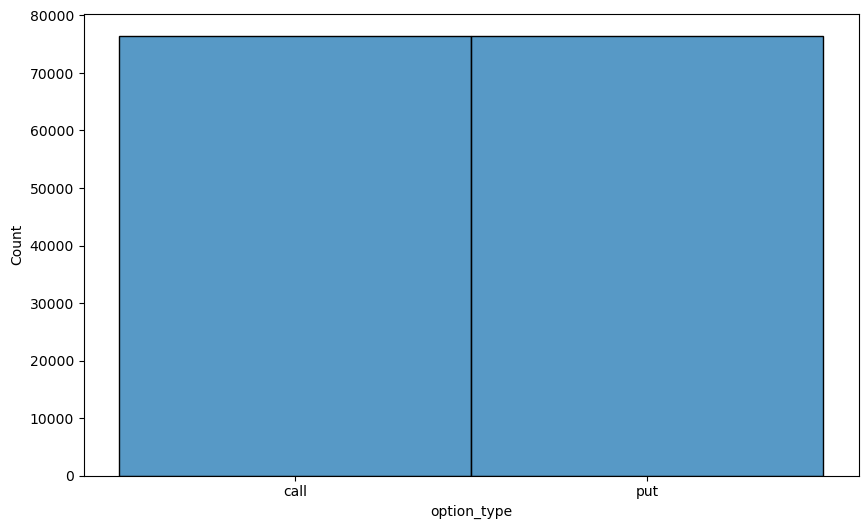

In [38]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df["option_type"])
